# Install Dependencies

In [ ]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.2 MB/s eta 0:00:00


# Import Libraries and Backend

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle"""
import os
# Set recommended backend explicitly to avoid the automatic backend selection

# Why Paddle? DeepXDE recommends it now for better performance and fewer TensorFlow-related warnings.
os.environ["DDE_BACKEND"] = "paddle"

import deepxde as dde
import numpy as np

# Define functions

In [ ]:
def func_0(x):
    return x * np.sin(5 * x) # smooth, oscillatory function with some nonlinear behavior

def func_1(x): # Higher frequency oscillation and exponential decay
    return np.exp(-x**2) * np.cos(10 * x) # has a Gaussian envelope (exp(-x²)) that decays towards zero near the boundaries, more challenging

def func_2(x): # Nonlinear polynomial combined with sine
    return x**3 + 0.5 * np.sin(3 * x) # mixes smooth polynomial growth and oscillation, testing the network’s ability to capture multiple types of behavior.

list_of_functions = [func_0, func_1, func_2]

# Problem Setup

In [ ]:
geom = dde.geometry.Interval(-1, 1) # Definition of the computational domain (Geometry specification)
num_train = 16 # Sampled points inside "geom" domain. These points are used to learn
num_test = 100 # These points also inside "geom" but not shown during the training, used to evaluate the model's performance

# Model preparation and training


Training model for func_0...

Compiling model...
Building feed-forward neural network...
'build' took 0.091501 s

'compile' took 1.297187 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.83e-01]    [2.43e-01]    [1.08e+00]    
1000      [7.91e-04]    [6.53e-04]    [5.59e-02]    
2000      [2.06e-04]    [2.19e-04]    [3.24e-02]    
3000      [8.12e-05]    [1.14e-04]    [2.34e-02]    
4000      [5.53e-05]    [8.98e-05]    [2.07e-02]    
5000      [6.30e-05]    [9.45e-05]    [2.13e-02]    
6000      [3.31e-05]    [6.42e-05]    [1.75e-02]    
7000      [2.44e-05]    [5.40e-05]    [1.61e-02]    
8000      [4.43e-05]    [6.38e-05]    [1.75e-02]    
9000      [1.32e-05]    [3.87e-05]    [1.36e-02]    
10000     [2.70e-05]    [5.68e-05]    [1.65e-02]    

Best model at step 9000:
  train loss: 1.32e-05
  test loss: 3.87e-05
  test metric: [1.36e-02]

'train' took 11.063151 s



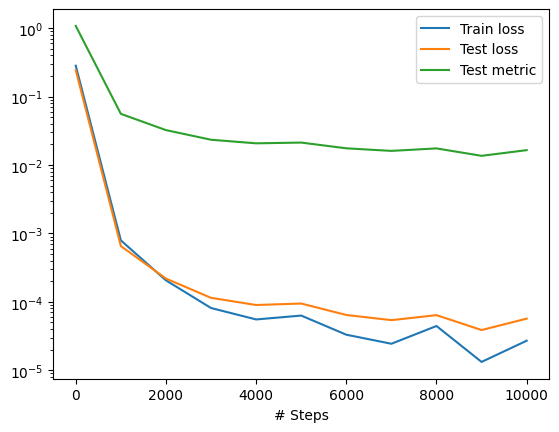

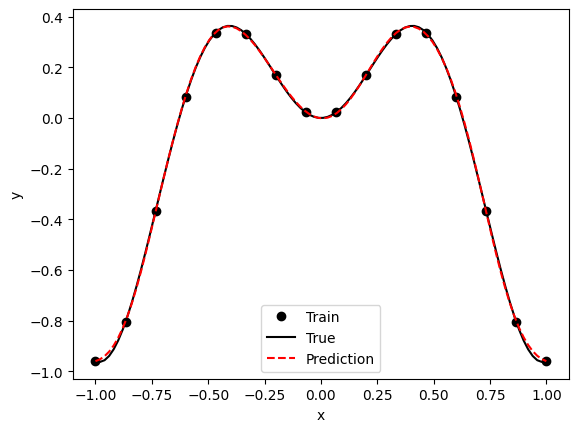


Training model for func_1...

Compiling model...
Building feed-forward neural network...
'build' took 0.162224 s

'compile' took 1.422410 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.24e-01]    [3.34e-01]    [1.06e+00]    
1000      [6.67e-02]    [6.97e-02]    [4.82e-01]    
2000      [8.80e-04]    [1.13e-03]    [6.13e-02]    
3000      [1.20e-10]    [9.35e-04]    [5.59e-02]    
4000      [2.06e-09]    [9.29e-04]    [5.57e-02]    
5000      [2.35e-06]    [9.25e-04]    [5.56e-02]    
6000      [1.62e-10]    [9.14e-04]    [5.52e-02]    
7000      [3.24e-10]    [9.04e-04]    [5.49e-02]    
8000      [2.02e-10]    [8.93e-04]    [5.46e-02]    
9000      [5.71e-11]    [8.82e-04]    [5.43e-02]    
10000     [1.75e-08]    [8.72e-04]    [5.39e-02]    

Best model at step 9000:
  train loss: 5.71e-11
  test loss: 8.82e-04
  test metric: [5.43e-02]

'train' took 11.306431 s



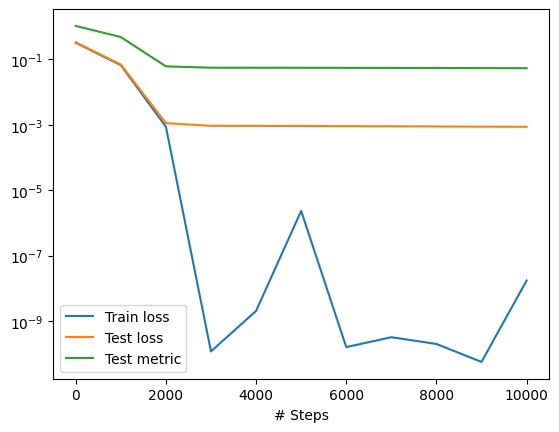

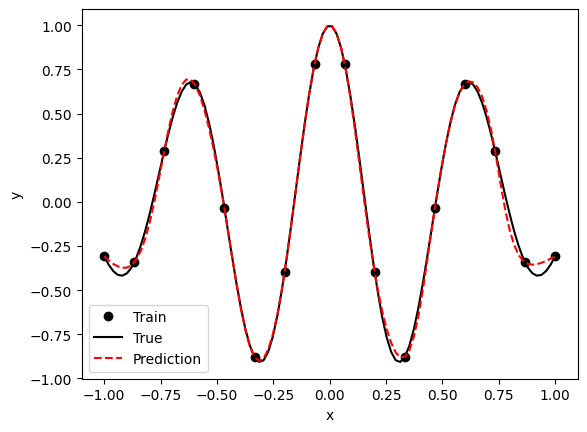


Training model for func_2...

Compiling model...
Building feed-forward neural network...
'build' took 0.205352 s

'compile' took 1.302635 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.43e-01]    [2.21e-01]    [7.18e-01]    
1000      [7.35e-04]    [5.68e-04]    [3.64e-02]    
2000      [5.66e-04]    [4.10e-04]    [3.10e-02]    
3000      [2.26e-04]    [1.63e-04]    [1.95e-02]    
4000      [1.65e-04]    [1.33e-04]    [1.77e-02]    
5000      [1.30e-04]    [1.08e-04]    [1.59e-02]    
6000      [1.09e-04]    [9.21e-05]    [1.47e-02]    
7000      [9.51e-05]    [8.12e-05]    [1.38e-02]    
8000      [8.47e-05]    [7.30e-05]    [1.31e-02]    
9000      [7.69e-05]    [6.92e-05]    [1.27e-02]    
10000     [8.97e-05]    [6.37e-05]    [1.22e-02]    

Best model at step 9000:
  train loss: 7.69e-05
  test loss: 6.92e-05
  test metric: [1.27e-02]

'train' took 12.268501 s



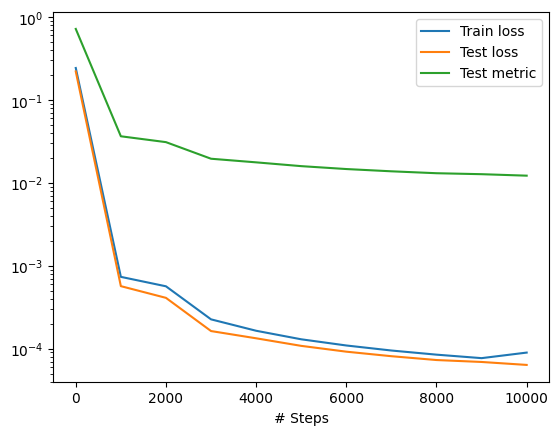

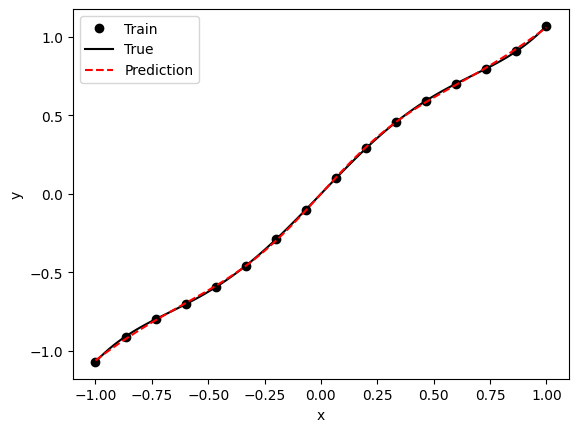

In [ ]:
activation = "tanh"
initializer = "Glorot uniform"

for i, f in enumerate(list_of_functions):
    print(f"\nTraining model for func_{i}...\n")

    data = dde.data.Function(geom, f, num_train, num_test)
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    dde.saveplot(losshistory, train_state, issave=False, isplot=True)

# Hyperparameter Finetuning

**Activation functions**

Changing between activation functions, can be observed the importance of them. Select func_1 and see the differences at the performances. Awful performance from Relu (linear)


=== Training model with activation = 'tanh' (1/3) ===

Compiling model...
Building feed-forward neural network...
'build' took 0.080051 s

'compile' took 1.218643 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.24e-01]    [3.34e-01]    [1.06e+00]    
1000      [6.67e-02]    [6.97e-02]    [4.82e-01]    
2000      [8.80e-04]    [1.13e-03]    [6.13e-02]    
3000      [1.20e-10]    [9.35e-04]    [5.59e-02]    
4000      [2.06e-09]    [9.29e-04]    [5.57e-02]    
5000      [2.35e-06]    [9.25e-04]    [5.56e-02]    
6000      [1.62e-10]    [9.14e-04]    [5.52e-02]    
7000      [3.24e-10]    [9.04e-04]    [5.49e-02]    
8000      [2.02e-10]    [8.93e-04]    [5.46e-02]    
9000      [5.71e-11]    [8.82e-04]    [5.43e-02]    
10000     [1.75e-08]    [8.72e-04]    [5.39e-02]    

Best model at step 9000:
  train loss: 5.71e-11
  test loss: 8.82e-04
  test metric: [5.43e-02]

'train' took 12.732124 s



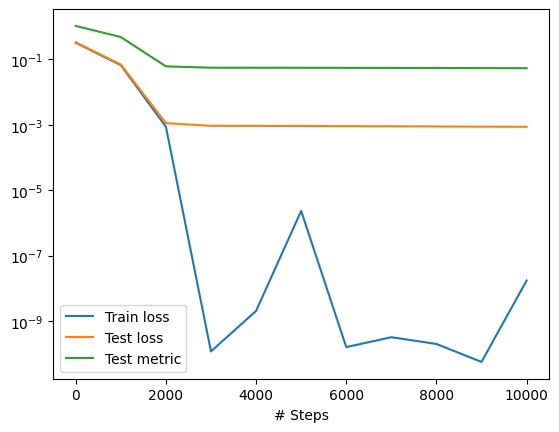

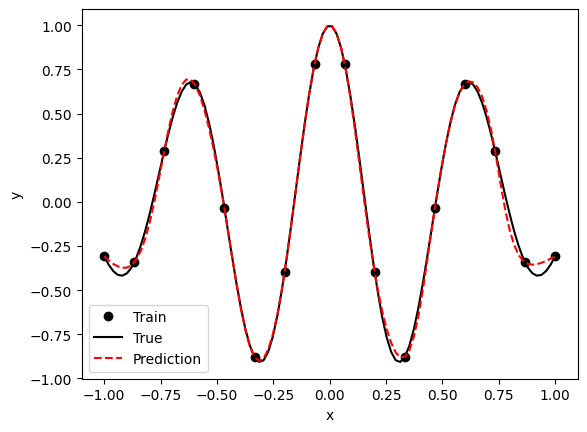


=== Training model with activation = 'relu' (2/3) ===

Compiling model...
Building feed-forward neural network...
'build' took 0.092569 s

'compile' took 1.672539 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.39e-01]    [3.43e-01]    [1.07e+00]    
1000      [8.21e-03]    [1.34e-02]    [2.11e-01]    
2000      [5.33e-03]    [8.58e-03]    [1.69e-01]    
3000      [5.32e-03]    [8.41e-03]    [1.68e-01]    
4000      [5.37e-03]    [8.10e-03]    [1.64e-01]    
5000      [5.32e-03]    [8.32e-03]    [1.67e-01]    
6000      [5.33e-03]    [8.20e-03]    [1.65e-01]    
7000      [5.32e-03]    [8.27e-03]    [1.66e-01]    
8000      [5.32e-03]    [8.20e-03]    [1.65e-01]    
9000      [5.32e-03]    [8.20e-03]    [1.65e-01]    
10000     [5.32e-03]    [8.21e-03]    [1.65e-01]    

Best model at step 5000:
  train loss: 5.32e-03
  test loss: 8.32e-03
  test metric: [1.67e-01]

'train' took 12.420376 s



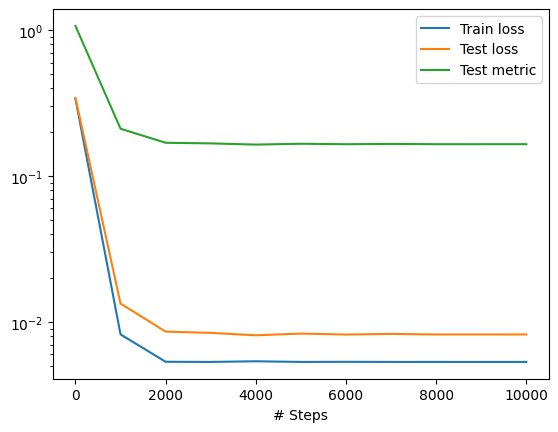

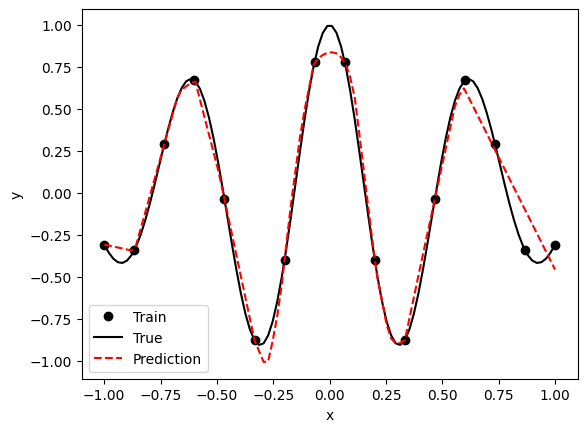


=== Training model with activation = 'sigmoid' (3/3) ===

Compiling model...
Building feed-forward neural network...
'build' took 0.084619 s

'compile' took 1.220703 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.67e+00]    [1.66e+00]    [2.35e+00]    
1000      [2.86e-01]    [3.00e-01]    [1.00e+00]    
2000      [2.86e-01]    [3.00e-01]    [1.00e+00]    
3000      [2.85e-01]    [2.99e-01]    [9.99e-01]    
4000      [2.81e-01]    [2.97e-01]    [9.95e-01]    
5000      [2.69e-01]    [2.84e-01]    [9.74e-01]    
6000      [3.78e-03]    [3.63e-03]    [1.10e-01]    
7000      [8.71e-04]    [8.14e-04]    [5.21e-02]    
8000      [2.06e-05]    [9.69e-04]    [5.69e-02]    
9000      [9.16e-08]    [1.16e-03]    [6.22e-02]    
10000     [2.76e-10]    [1.17e-03]    [6.26e-02]    

Best model at step 10000:
  train loss: 2.76e-10
  test loss: 1.17e-03
  test metric: [6.26e-02]

'train' took 13.770308 s



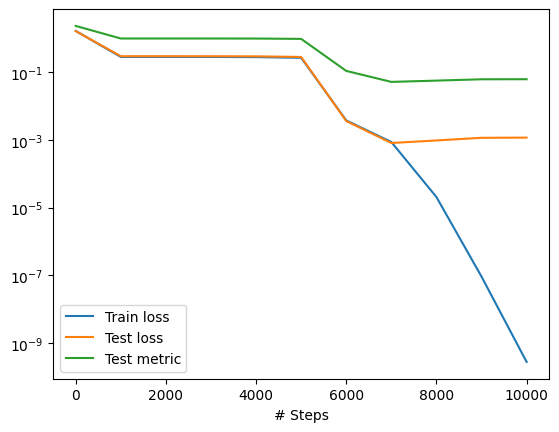

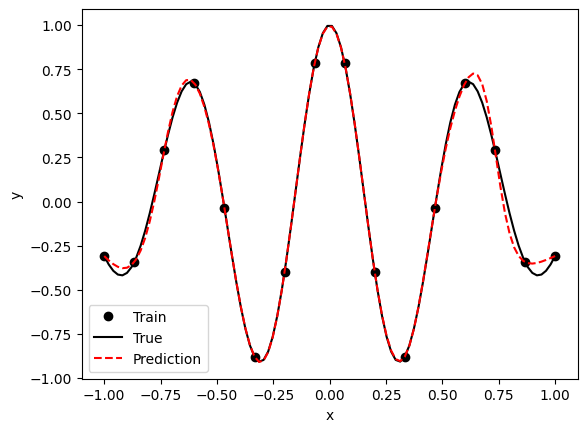

In [ ]:
list_of_activations = ["tanh", "relu", "sigmoid"]
selected_function = func_1

for i, act in enumerate(list_of_activations):
    print(f"\n=== Training model with activation = '{act}' ({i+1}/{len(list_of_activations)}) ===\n")

    # 1) Data for the chosen function
    data = dde.data.Function(geom, selected_function, num_train, num_test)

    # 2) Network with current activation
    net = dde.nn.FNN([1] + [20]*3 + [1], act, initializer)

    # 3) Build, compile, and train
    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    # 4) Plot losses & errors
    dde.saveplot(losshistory, train_state, issave=False, isplot=True)

**Geometry changes**

Changing the number of sampling points, will make us realiye about the importance of a proper points selection.

So, it will be important to consider precision and time (output table)

In [ ]:
geom = dde.geometry.Interval(-1, 1)
num_train_list = [4, 6, 8, 16, 32, 64]
num_test = 100

In [ ]:
activation = "tanh" # Best results at finetuning
initializer = "Glorot uniform"
function = func_1 # Most challenging


=== Training with num_train = 4 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.098565 s

'compile' took 1.674083 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [4.86e-01]    [3.34e-01]    [1.06e+00]    
1000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
2000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
3000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
4000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
5000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
6000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
7000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
8000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
9000      [0.00e+00]    [8.66e-01]    [1.70e+00]    
10000     [0.00e+00]    [8.66e-01]    [1.70e+00]    

Best model at step 1000:
  train loss: 0.00e+00
  test loss: 8.66e-01
  test metric: [1.70e+00]

'train' took 18.876738 s



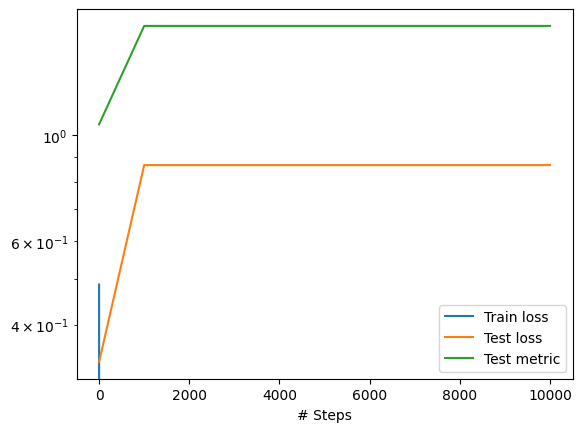

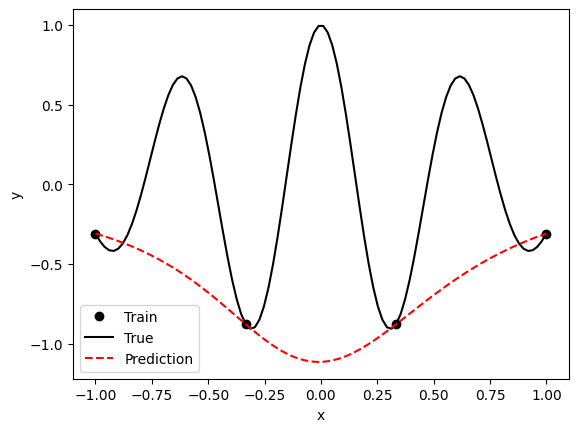


=== Training with num_train = 6 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.091441 s

'compile' took 1.714307 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.80e-01]    [3.34e-01]    [1.06e+00]    
1000      [4.27e-08]    [7.40e-01]    [1.57e+00]    
2000      [4.59e-06]    [7.40e-01]    [1.57e+00]    
3000      [8.04e-06]    [7.39e-01]    [1.57e+00]    
4000      [6.43e-08]    [7.40e-01]    [1.57e+00]    
5000      [1.66e-05]    [7.41e-01]    [1.57e+00]    
6000      [8.33e-06]    [7.40e-01]    [1.57e+00]    
7000      [4.02e-09]    [7.40e-01]    [1.57e+00]    
8000      [9.14e-06]    [7.40e-01]    [1.57e+00]    
9000      [9.09e-11]    [7.39e-01]    [1.57e+00]    
10000     [1.13e-10]    [7.39e-01]    [1.57e+00]    

Best model at step 9000:
  train loss: 9.09e-11
  test loss: 7.39e-01
  test metric: [1.57e+00]

'train' took 21.919345 s



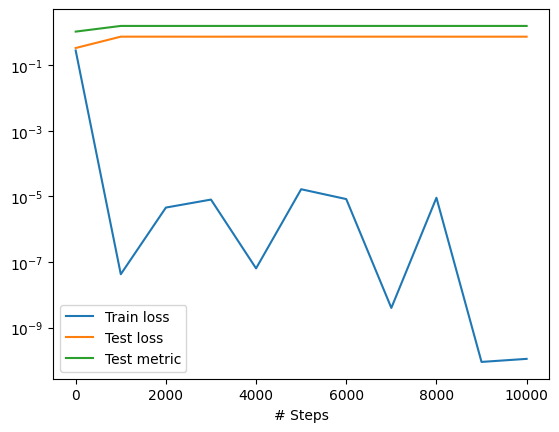

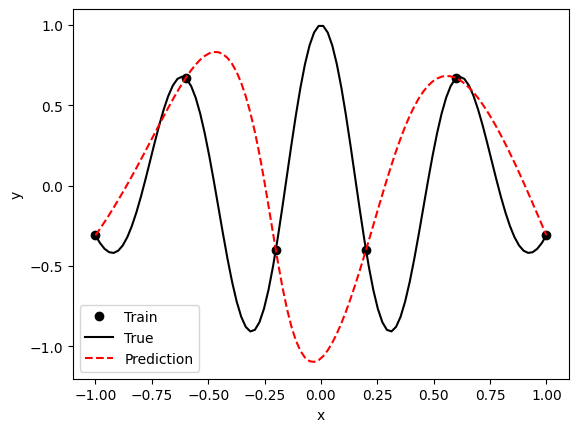


=== Training with num_train = 8 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.124784 s

'compile' took 1.796807 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.38e-01]    [3.34e-01]    [1.06e+00]    
1000      [4.37e-02]    [2.71e-01]    [9.52e-01]    
2000      [3.13e-07]    [1.21e-01]    [6.36e-01]    
3000      [3.06e-04]    [1.22e-01]    [6.39e-01]    
4000      [5.52e-07]    [1.21e-01]    [6.35e-01]    
5000      [5.77e-07]    [1.21e-01]    [6.35e-01]    
6000      [1.02e-06]    [1.21e-01]    [6.35e-01]    
7000      [2.14e-06]    [1.21e-01]    [6.35e-01]    
8000      [5.85e-05]    [1.21e-01]    [6.34e-01]    
9000      [1.05e-09]    [1.21e-01]    [6.35e-01]    
10000     [1.26e-05]    [1.21e-01]    [6.35e-01]    

Best model at step 9000:
  train loss: 1.05e-09
  test loss: 1.21e-01
  test metric: [6.35e-01]

'train' took 22.019186 s



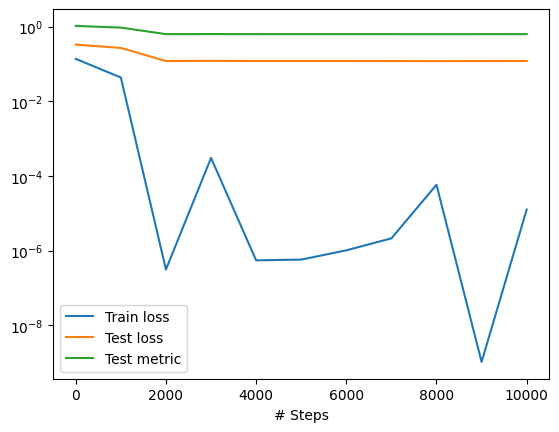

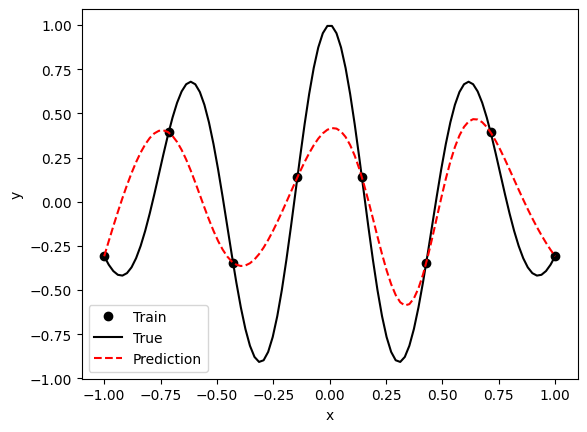


=== Training with num_train = 16 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.086543 s

'compile' took 1.789212 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.24e-01]    [3.34e-01]    [1.06e+00]    
1000      [6.67e-02]    [6.97e-02]    [4.82e-01]    
2000      [8.80e-04]    [1.13e-03]    [6.13e-02]    
3000      [1.20e-10]    [9.35e-04]    [5.59e-02]    
4000      [2.06e-09]    [9.29e-04]    [5.57e-02]    
5000      [2.35e-06]    [9.25e-04]    [5.56e-02]    
6000      [1.62e-10]    [9.14e-04]    [5.52e-02]    
7000      [3.24e-10]    [9.04e-04]    [5.49e-02]    
8000      [2.02e-10]    [8.93e-04]    [5.46e-02]    
9000      [5.71e-11]    [8.82e-04]    [5.43e-02]    
10000     [1.75e-08]    [8.72e-04]    [5.39e-02]    

Best model at step 9000:
  train loss: 5.71e-11
  test loss: 8.82e-04
  test metric: [5.43e-02]

'train' took 22.091850 s



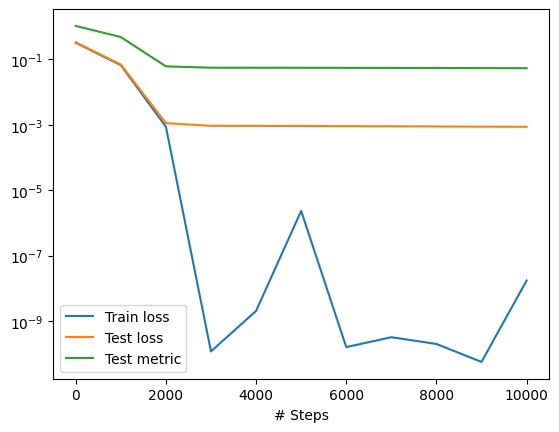

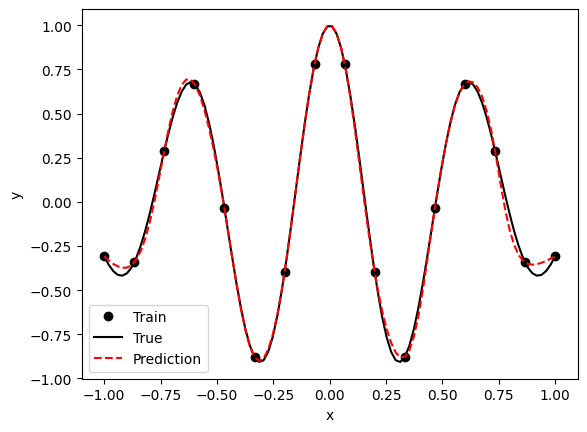


=== Training with num_train = 32 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.080053 s

'compile' took 1.840453 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.30e-01]    [3.34e-01]    [1.06e+00]    
1000      [7.10e-02]    [7.14e-02]    [4.88e-01]    
2000      [1.06e-03]    [7.79e-04]    [5.10e-02]    
3000      [1.12e-04]    [9.18e-05]    [1.75e-02]    
4000      [3.36e-05]    [3.10e-05]    [1.02e-02]    
5000      [1.85e-05]    [1.82e-05]    [7.78e-03]    
6000      [1.32e-05]    [1.32e-05]    [6.63e-03]    
7000      [7.51e-05]    [7.47e-05]    [1.58e-02]    
8000      [1.73e-04]    [1.76e-04]    [2.43e-02]    
9000      [1.67e-05]    [1.73e-05]    [7.59e-03]    
10000     [2.40e-05]    [2.47e-05]    [9.08e-03]    

Best model at step 6000:
  train loss: 1.32e-05
  test loss: 1.32e-05
  test metric: [6.63e-03]

'train' took 21.320278 s



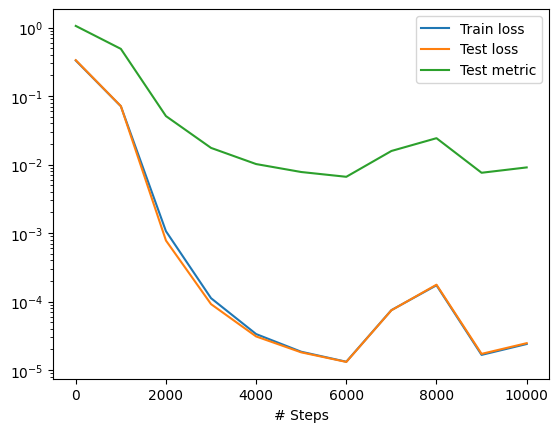

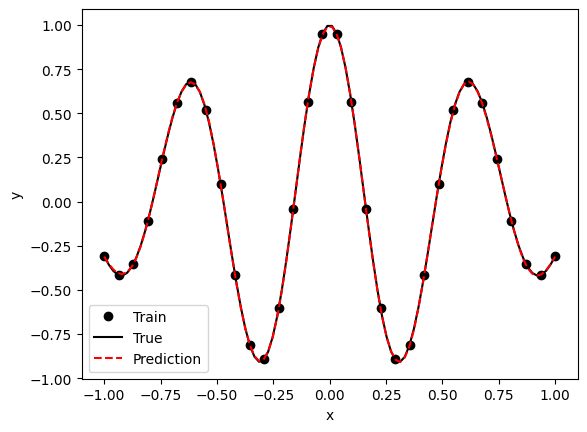


=== Training with num_train = 64 ===

Compiling model...
Building feed-forward neural network...
'build' took 0.086087 s

'compile' took 5.394070 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [3.33e-01]    [3.34e-01]    [1.06e+00]    
1000      [7.38e-02]    [7.37e-02]    [4.96e-01]    
2000      [7.06e-04]    [6.47e-04]    [4.65e-02]    
3000      [3.32e-05]    [3.01e-05]    [1.00e-02]    
4000      [1.69e-04]    [1.70e-04]    [2.38e-02]    
5000      [3.07e-05]    [3.06e-05]    [1.01e-02]    
6000      [1.05e-05]    [1.03e-05]    [5.87e-03]    
7000      [6.95e-05]    [6.94e-05]    [1.52e-02]    
8000      [7.93e-06]    [7.79e-06]    [5.10e-03]    
9000      [7.01e-06]    [6.90e-06]    [4.80e-03]    
10000     [3.41e-05]    [3.42e-05]    [1.07e-02]    

Best model at step 9000:
  train loss: 7.01e-06
  test loss: 6.90e-06
  test metric: [4.80e-03]

'train' took 22.483353 s



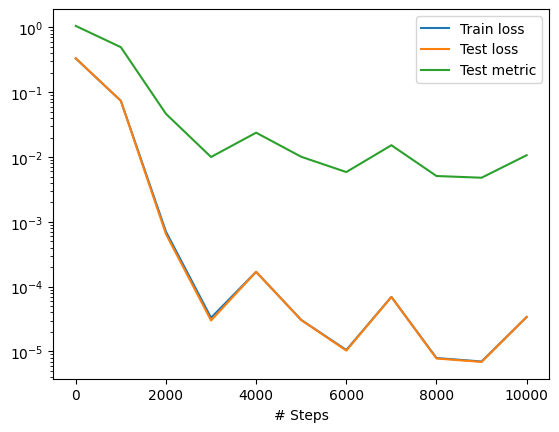

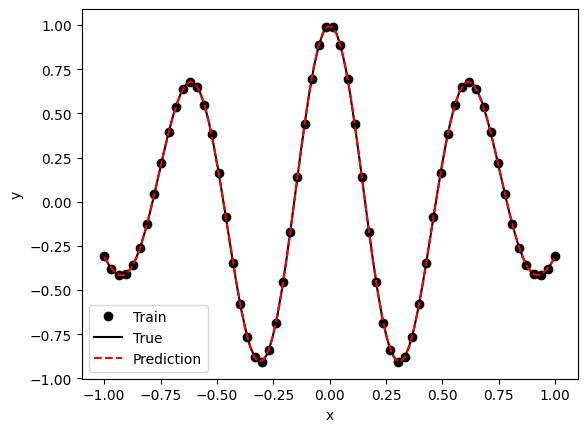


=== Summary Table ===
+----------------+------------+------------+---------------+---------+
| # Train Points | Train Loss | Test Loss  | L2 Rel. Error |  Time   |
+----------------+------------+------------+---------------+---------+
|       4        | 0.0000e+00 | 8.6624e-01 |  1.7002e+00   | 20.56 s |
|       6        | 1.1267e-10 | 7.3887e-01 |  1.5702e+00   | 23.64 s |
|       8        | 1.2649e-05 | 1.2102e-01 |  6.3547e-01   | 23.82 s |
|       16       | 1.7497e-08 | 8.7198e-04 |  5.3942e-02   | 23.88 s |
|       32       | 2.4028e-05 | 2.4722e-05 |  9.0828e-03   | 23.16 s |
|       64       | 3.4051e-05 | 3.4171e-05 |  1.0678e-02   | 27.88 s |
+----------------+------------+------------+---------------+---------+


In [ ]:
import time
from tabulate import tabulate  # For pretty table formatting

lr = 0.001
iterations = 10000

# Store results
results = []

# Run training for each num_train
for num_train in num_train_list:
    print(f"\n=== Training with num_train = {num_train} ===\n")

    # Start timing
    start_time = time.time()

    # 1. Define the dataset
    data = dde.data.Function(geom, function, num_train, num_test)

    # 2. Define the neural network
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

    # 3. Create and train the model
    model = dde.Model(data, net)
    model.compile("adam", lr=lr, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=iterations)

    # End timing
    elapsed_time = time.time() - start_time

    # 4. Plot results
    dde.saveplot(losshistory, train_state, issave=False, isplot=True)

    # 5. Get final values
    last_train_loss = losshistory.loss_train[-1][0]
    last_test_loss = losshistory.loss_test[-1][0]
    last_test_metric = losshistory.metrics_test[-1][0]

    # 6. Store results
    results.append([
        num_train,
        f"{last_train_loss:.4e}",
        f"{last_test_loss:.4e}",
        f"{last_test_metric:.4e}",
        f"{elapsed_time:.2f} s"
    ])

# Print the table
headers = ["# Train Points", "Train Loss", "Test Loss", "L2 Rel. Error", "Time"]
print("\n=== Summary Table ===")
print(tabulate(results, headers=headers, tablefmt="pretty"))

It has been observed that between 32 and 64 points there is not much improvement at the performance but a considerable increase in the execution time.

At this point, we could say that it is not worth to consider 64 points

**Finetune train and test points**

In [ ]:
num_train_list = [4, 6, 8, 16, 32, 64]
num_test_list = [20, 50, 100, 200]
geom = dde.geometry.Interval(-1, 1) # Definition of the computational domain (Geometry specification)

activation = "tanh" # Best results at finetuning
initializer = "Glorot uniform"
function = func_1 # Most challenging

import time
from tabulate import tabulate  # For pretty table formatting

lr = 0.001
iterations = 10000

# Store results
results = []

# Run training for each num_train
# Loop over all combinations
for num_train in num_train_list:
    for num_test in num_test_list:
        print(f"\n=== Training with num_train = {num_train}, num_test = {num_test} ===\n")

        # Start timing
        start_time = time.time()

        # 1. Define the dataset
        data = dde.data.Function(geom, function, num_train, num_test)

        # 2. Define the neural network
        net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

        # 3. Create and train the model
        model = dde.Model(data, net)
        model.compile("adam", lr=lr, metrics=["l2 relative error"])
        losshistory, train_state = model.train(iterations=iterations)

        # End timing
        elapsed_time = time.time() - start_time

        # 4. Plot results
        dde.saveplot(losshistory, train_state, issave=False, isplot=True)

        # 5. Get final values
        last_train_loss = losshistory.loss_train[-1][0]
        last_test_loss = losshistory.loss_test[-1][0]
        last_test_metric = losshistory.metrics_test[-1][0]

        # 6. Store results with both num_train and num_test
        results.append([
            num_train,
            num_test,
            f"{last_train_loss:.4e}",
            f"{last_test_loss:.4e}",
            f"{last_test_metric:.4e}",
            f"{elapsed_time:.2f} s"
        ])

# Print the table
headers = ["# Train Points", "# Test Points", "Train Loss", "Test Loss", "L2 Rel. Error", "Time"]
print("\n=== Summary Table ===")
print(tabulate(results, headers=headers, tablefmt="pretty"))

Output hidden; open in https://colab.research.google.com to view.

With this experiment can be seen the importance of selecting a proper number of samples.

Finetuning could be continue doing with learning rate

# Change Domain (for fun)


Training model for func_0...

Compiling model...
Building feed-forward neural network...
'build' took 0.084088 s

'compile' took 1.771093 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.52e-01]    [2.53e-01]    [1.28e+00]    
1000      [1.52e-01]    [1.55e-01]    [1.00e+00]    
2000      [1.52e-01]    [1.55e-01]    [1.00e+00]    
3000      [1.45e-01]    [1.48e-01]    [9.76e-01]    
4000      [4.28e-03]    [4.41e-03]    [1.69e-01]    
5000      [1.75e-03]    [2.03e-03]    [1.14e-01]    
6000      [6.76e-04]    [7.80e-04]    [7.09e-02]    
7000      [5.29e-04]    [6.25e-04]    [6.35e-02]    
8000      [3.22e-04]    [5.68e-04]    [6.05e-02]    
9000      [2.05e-04]    [6.32e-04]    [6.39e-02]    
10000     [1.56e-04]    [6.72e-04]    [6.58e-02]    

Best model at step 10000:
  train loss: 1.56e-04
  test loss: 6.72e-04
  test metric: [6.58e-02]

'train' took 23.832881 s



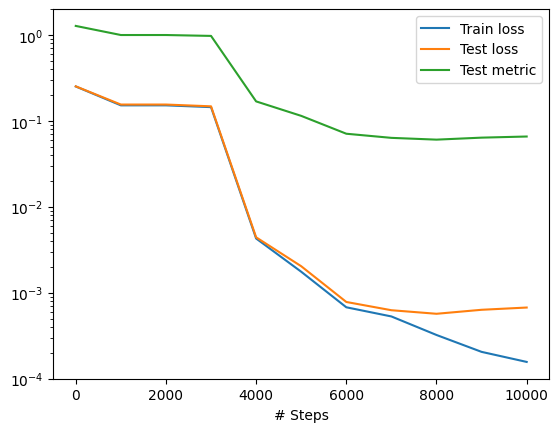

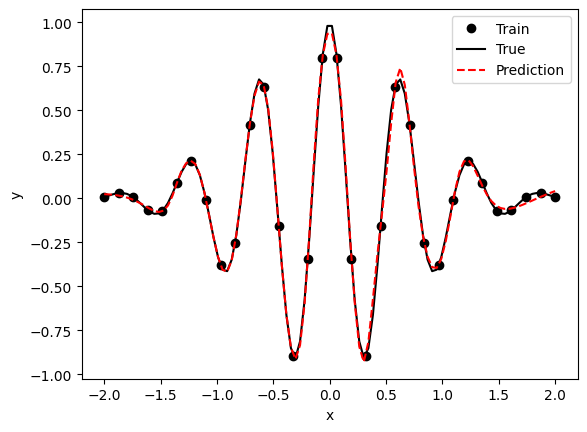

In [ ]:
# As the domain has been changed, the performance of the model accoding to the previous finetune will be differnent
# as we have completedly change the behaviour of itself

# I just want to see the function in a different domain

geom = dde.geometry.Interval(-2, 2) # Definition of the computational domain (Geometry specification)
num_train = 32 # Sampled points inside "geom" domain. These points are used to learn
num_test = 100 # These points also inside "geom" but not shown during the training, used to evaluate the model's performance

list_of_functions = [func_1]

activation = "tanh"
initializer = "Glorot uniform"

for i, f in enumerate(list_of_functions):
    print(f"\nTraining model for func_{i}...\n")

    data = dde.data.Function(geom, f, num_train, num_test)
    net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])
    losshistory, train_state = model.train(iterations=10000)

    dde.saveplot(losshistory, train_state, issave=False, isplot=True)